In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Movie_collection_Independent.csv to Movie_collection_Independent.csv
Saving Movie_collection_Target.csv to Movie_collection_Target.csv


In [4]:
import io
data_x = pd.read_csv(io.BytesIO(uploaded['Movie_collection_Independent.csv']))
data_y = pd.read_csv(io.BytesIO(uploaded['Movie_collection_Target.csv']))

In [5]:
data_x.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [6]:
data_y.head()

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


In [7]:
data_x.shape

(506, 19)

In [8]:
data_y.shape

(506, 1)

In [9]:
from  sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(data_x,data_y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [10]:
X_train.shape

(284, 19)

In [11]:
X_test.shape

(127, 19)

In [12]:
X_valid.shape

(95, 19)

In [13]:
X_train_full.shape

(379, 19)

In [14]:
y_train_full.shape

(379, 1)

In [15]:
y_train.shape

(284, 1)

In [16]:
y_valid.shape

(95, 1)

In [17]:
y_test.shape

(127, 1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model= keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[19]),
    keras.layers.Dense(30,activation="relu") ,
    keras.layers.Dense(1)     
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                600       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-2),
              metrics=['mae'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [23]:
model_history= model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid))

Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 3.7051 - mae: 1.6837 - val_loss: 1.5134 - val_mae: 1.0270
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.8049 - mae: 0.7017 - val_loss: 0.7741 - val_mae: 0.6938
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5344 - mae: 0.5752 - val_loss: 0.5643 - val_mae: 0.5909
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4031 - mae: 0.4938 - val_loss: 0.4334 - val_mae: 0.5210
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3196 - mae: 0.4360 - val_loss: 0.3577 - val_mae: 0.4742
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2654 - mae: 0.3940 - val_loss: 0.3054 - val_mae: 0.4403
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2292 - mae: 0.3646 - val_loss: 0.2627 - val_mae: 0.4063
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2028 - mae: 0.3400 - va

In [24]:
mae_test=model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2852 - mae: 0.2786


In [25]:
model_history.history

{'loss': [3.7051382064819336,
  0.8049362301826477,
  0.5343937277793884,
  0.4030892848968506,
  0.3196466863155365,
  0.2654058039188385,
  0.22918854653835297,
  0.20278684794902802,
  0.18602553009986877,
  0.1711827516555786,
  0.15834027528762817,
  0.1506919264793396,
  0.14323687553405762,
  0.13740918040275574,
  0.1308312565088272,
  0.12692905962467194,
  0.12337271124124527,
  0.1197231188416481,
  0.11679045110940933,
  0.11306770890951157,
  0.11098860949277878,
  0.10840649902820587,
  0.10606019198894501,
  0.10412035882472992,
  0.10202547162771225,
  0.10033942013978958,
  0.09871717542409897,
  0.09766828268766403,
  0.09514550119638443,
  0.09414675831794739,
  0.09169479459524155,
  0.09133156388998032,
  0.08956059068441391,
  0.08890088647603989,
  0.0872143805027008,
  0.08587538450956345,
  0.0849984809756279,
  0.08360110223293304,
  0.08260929584503174,
  0.08193270117044449,
  0.08138073235750198,
  0.08013880252838135,
  0.0792536810040474,
  0.078912317752

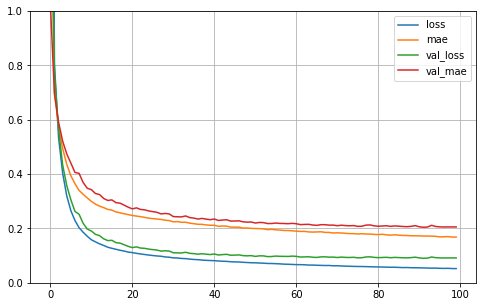

In [26]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [27]:
X_new= X_test[:6]

In [28]:
y_pred= model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 76ms/step
[[2.514576 ]
 [2.663156 ]
 [1.8457003]
 [2.47076  ]
 [1.7309105]
 [2.4071996]]


In [29]:
y_test[:6]

,Collection
173,2.240000
274,2.826667
491,1.573333
72,2.186667
452,1.740000
76,2.000000
